In [102]:
import cv2,os
import numpy as np

In [50]:
datapath=r"C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages"

#this takes subfolders,files inside the datapath
categories=os.listdir(datapath)
print(categories)

#arange-creating sequences of numbers
labels=np.arange(len(categories))
print(labels)

#put the label and category into a dictionary.
label_dict=dict(zip(categories,labels))
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


In [52]:
img_size=50
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(datapath, category)
    print(folder_path)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        try:
            img=cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print(img_path, e)


    

C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages\Cat
C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages\Cat\10125.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages\Cat\10404.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages\Cat\10501.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

C:\Users\Sandalika\Downloads\OneDrive_2024-07-22\Day 05\kagglecatsanddogs_5340\PetImages\Cat\10820.jpg OpenCV

In [84]:
#convert data and target into numpy array
data=np.array(data)
target=np.array(target)
print(data, target)

[[[171 180 186 ... 220 213 207]
  [172 179 186 ... 220 215 211]
  [171 179 181 ... 219 217 215]
  ...
  [133 137 140 ...   5   4   4]
  [129 133 136 ...   3   3   3]
  [126 130 134 ...   2   2   2]]

 [[ 44  60  41 ...  95  94 197]
  [ 41  43  43 ...  93  80 192]
  [ 41  40  46 ...  90  86 193]
  ...
  [ 25  21  26 ...  43  67  73]
  [ 21  23  21 ...  74  36  89]
  [ 23  22  20 ...  59  62  32]]

 [[ 45  48  53 ... 147 149 153]
  [ 57  59  70 ... 152 150 156]
  [ 59  64  59 ... 155 154 158]
  ...
  [159 155 136 ... 149 167 166]
  [151 145 141 ... 146 166 169]
  [149 134 132 ... 143 163 164]]

 ...

 [[ 48  55  54 ...  59  69  70]
  [ 31  29  44 ...  54  60  70]
  [ 42  55  40 ...  71  68  73]
  ...
  [121  94 129 ... 173 161 140]
  [106 115  78 ... 176 152 178]
  [ 80 141  94 ... 140  94 181]]

 [[253 239 207 ... 240 243 251]
  [246 229 178 ... 227 175 205]
  [232 158 107 ... 240 136 207]
  ...
  [ 79  73  70 ... 116 117 131]
  [ 83  74  83 ... 128 122 131]
  [ 86  80  85 ... 105 100 1

In [56]:
print(data.shape, target.shape)

(24946, 50, 50) (24946,)


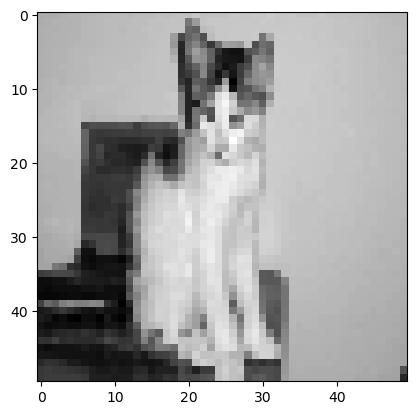

In [80]:
from matplotlib import pyplot as plt
plt.imshow(data[10000], cmap='gray')

In [82]:
target[10000]

0

In [106]:
#image normalizing
data_new=data/255.0
#sending te image as 4D
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1)
print(data_new.shape)
#categorical encoding
from tensorflow.keras.utils import to_categorical
target_new=to_categorical(target)
print(target_new)


(24946, 50, 50, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [110]:
#data and target (gray scaled ones) are saved to a physical file
data=np.save('data', data_new)
target=np.save('target',target_new)